In [9]:
# import pandas
import pandas as pd
import numpy as np
import geopandas as gpd

GeoCustomers = pd.read_csv('GeoCustomers.csv')

In [10]:
# Creating a GeoDataFrame from the GeoCustomers DataFrame
GeoCustomers = gpd.GeoDataFrame(GeoCustomers, geometry=gpd.points_from_xy(GeoCustomers.long, GeoCustomers.lat))
GeoCustomers.head()

,customer_id,lat,long,state,cluster,customer_category,geometry,nearest_coastline,distance_to_coastline
0,1,-33.894912,151.206211,NSW,2,Gold,POINT (151.20621 -33.89491),POINT (143.87669372558594 -9.145400047302246),25.812016
1,2,-33.731651,150.955942,NSW,3,Bronze,POINT (150.95594 -33.73165),POINT (143.87669372558594 -9.145400047302246),25.585142
2,4,-28.035453,153.241258,QLD,3,Bronze,POINT (153.24126 -28.03545),POINT (143.87669372558594 -9.145400047302246),21.083860
3,5,-30.604667,152.956681,NSW,1,Silver,POINT (152.95668 -30.60467),POINT (143.87669372558594 -9.145400047302246),23.301208
4,6,-38.215906,144.334005,VIC,1,Silver,POINT (144.33400 -38.21591),POINT (143.8740997314453 -9.145500183105469),29.074044


                                            geometry
0  POLYGON ((143.87410 -9.14550, 143.87289 -9.144...
1  POLYGON ((142.70329 -9.38051, 142.69749 -9.380...
2  POLYGON ((142.70580 -9.43130, 142.70340 -9.431...
3  POLYGON ((142.53090 -9.43960, 142.53000 -9.439...
4  POLYGON ((143.54581 -9.51300, 143.54330 -9.512...
POLYGON ((143.8740997314453 -9.145500183105469, 143.87289428710938 -9.144200325012207, 143.87289428710938 -9.14330005645752, 143.87339782714844 -9.142900466918945, 143.8759002685547 -9.142999649047852, 143.87710571289062 -9.144200325012207, 143.87710571289062 -9.145000457763672, 143.87669372558594 -9.145400047302246, 143.8740997314453 -9.145500183105469))


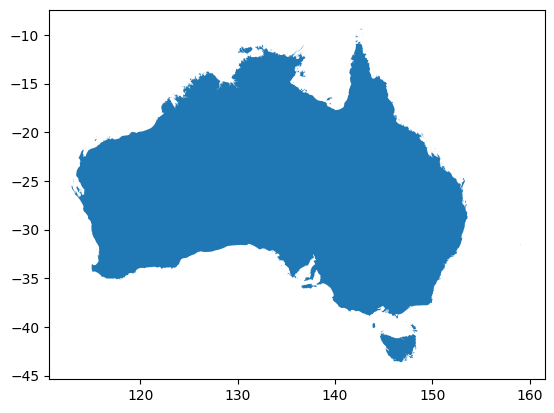

In [11]:
# Load the coastline_250m shapefile
CoastLine = gpd.read_file('/home/meow/Desktop/internship-speedrun/kpmg/coastline_250m.shp')
CoastLine.plot()
print(CoastLine.head())
print(CoastLine.iloc[0]['geometry'])

<Axes: >

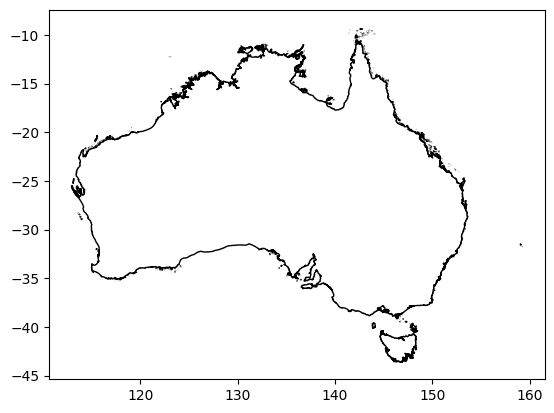

In [12]:
# Making a geopandas point dataframe column for the nearest coastline for each customer
from shapely.ops import Point, nearest_points

sample_customer = GeoCustomers['geometry'][0]
# Point (long, lat) type object

sample_coastline = CoastLine['geometry'][0]
# Polygon ((long, lat), (long, lat), (long, lat), (long, lat)) type object
sample_coastline

# Construct a Polygon object from the CoastLine plot
CoastLine.plot(facecolor='none', edgecolor='black')

,customer_id,lat,long,state,cluster,customer_category,geometry,nearest_coastline,distance_to_coastline
0,1,-33.894912,151.206211,NSW,2,Gold,POINT (151.20621 -33.89491),POINT (143.87669372558594 -9.145400047302246),25.812016
1,2,-33.731651,150.955942,NSW,3,Bronze,POINT (150.95594 -33.73165),POINT (143.87669372558594 -9.145400047302246),25.585142
2,4,-28.035453,153.241258,QLD,3,Bronze,POINT (153.24126 -28.03545),POINT (143.87669372558594 -9.145400047302246),21.083860
3,5,-30.604667,152.956681,NSW,1,Silver,POINT (152.95668 -30.60467),POINT (143.87669372558594 -9.145400047302246),23.301208
4,6,-38.215906,144.334005,VIC,1,Silver,POINT (144.33400 -38.21591),POINT (143.8740997314453 -9.145500183105469),29.074044


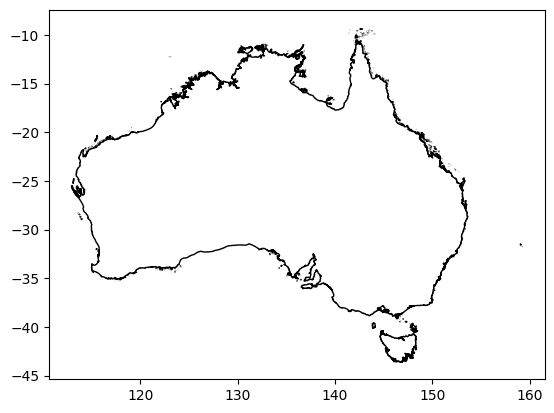

In [13]:
# Plotting coastline of a Shapefile

CoastLine.plot(facecolor='none', edgecolor='black')

# Getting the nearest coastline for each customer

# Create a new column for the nearest coastline

GeoCustomers['nearest_coastline'] = None

# Iterate over all the customers

for idx, row in GeoCustomers.iterrows():
    # Get the customer's location
    customer_location = row['geometry']
    
    # Get the nearest coastline
    nearest_coastline = nearest_points(customer_location, sample_coastline)[1]
    
    # Add the nearest coastline to the dataframe
    GeoCustomers.loc[idx, 'nearest_coastline'] = nearest_coastline
    
GeoCustomers.head()

# Shortest distance from the customer to the nearest coastline

GeoCustomers['distance_to_coastline'] = GeoCustomers.apply(lambda row: row['geometry'].distance(row['nearest_coastline']), axis=1)
GeoCustomers.head()


/tmp/ipykernel_723/1975115842.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


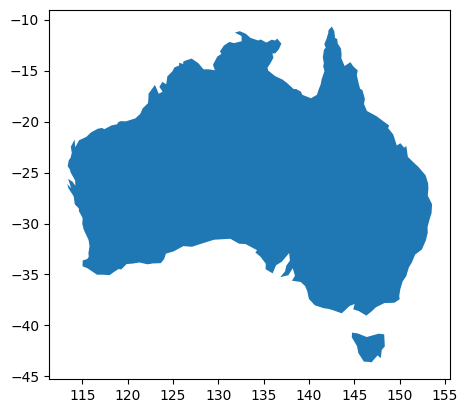

In [15]:
import geopandas as gpd
import folium
# Load the Natural Earth dataset for coastline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the dataset to get only the coastline of Australia
australia_coastline = world[world['name'] == 'Australia']

# Plot the coastline
australia_coastline.plot()

# Plotting all the availible coordinates as red dots for the right side of coastline of australia on the same map


# Filter the GeoCustomers dataframe to get only the coordinates on the right side of the coastline
right_side_coordinates = GeoCustomers[GeoCustomers['geometry'].x > australia_coastline.bounds['maxx'].values[0]]

# Create a new map
m_3 = folium.Map(location=[-35, 130], tiles='cartodbpositron', zoom_start=4)

# Add the coastline to the map
folium.GeoJson(australia_coastline).add_to(m_3)

# Display the map
m_3
